In [1]:
# imports

from self_reflection_helper import *
from self_prediction import *
from cot import Collection

"""Imports"""
from langchain.chat_models import ChatOpenAI
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    AIMessagePromptTemplate,
    HumanMessagePromptTemplate,
)
from langchain.schema import (
    AIMessage,
    HumanMessage,
    SystemMessage
)


import yaml

## Run CoT




In [2]:
data = Collection(["med_qa"], verbose=False)
data = data.select(split="test", number_samples=10, random_samples=True, seed=0)

Loading med_qa...


In [8]:
config={
    "instruction_keys": None,
    "cot_trigger_keys": ["zhou-01"],
    "answer_extraction_keys": 'auto-kojima', 
    "author" : "thoughtsource",
    "api_service": "openai_chat",
    "api_time_interval": 1,
    "engine": "gpt-3.5-turbo", 
    "temperature": 0,
    "max_tokens": 512,
    "verbose": False,
    "warn": False,
}
data.generate(config=config)
data.evaluate()
# med_qa.dump("med_qa")

Generating med_qa...


{'med_qa': {'test': {'accuracy': {'gpt-3.5-turbo': {'None_zhou-01_kojima-A-E': 0.7}}}}}

## Run reflection

In [13]:
# Choose a reflection model and template path
model = 'gpt-3.5-turbo'
template_path = "./reflection_messages/final_system_messages/first_template.yaml"
system_evaluate(data,model,template_path)

dataset_name = "med_qa_10_sample"
template = "first"
base_model = "gpt-3.5-turbo"
critique_model = "gpt-3.5-turbo"

dump_path = f"{dataset_name}_{template}_{base_model}_{critique_model}"
data.dump(dump_path+".json")

Generating med_qa...


  0%|          | 0/10 [00:00<?, ?ex/s]

KeyboardInterrupt: 

## Run Statistics on Reflection



Average over objectives for all items
        Average
obj_1      92.0
obj_2      91.0
obj_3      89.0
obj_4      90.0
obj_5      87.0
obj_6      88.0
obj_7      87.0
obj_8      91.0
obj_9      85.0
obj_10     89.0
obj_11     88.0




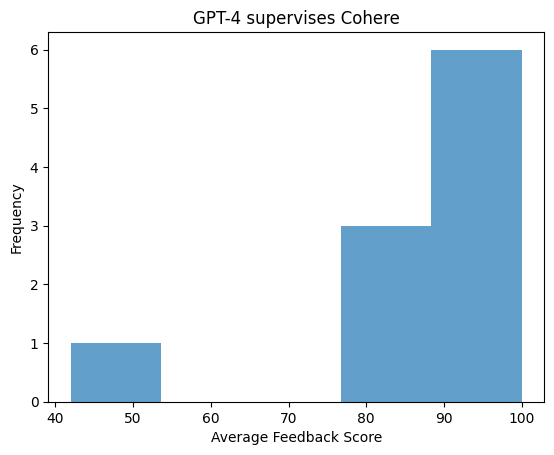

{'obj_11': [90, 0, 100, 100, 100, 100, 100], 'obj_9': [70, 50, 100, 100, 100, 80, 100], 'obj_3': [80, 50, 100, 100, 100, 90, 100], 'obj_4': [80, 50, 100, 100, 100, 100, 100], 'obj_5': [70, 50, 100, 100, 100, 90, 100], 'lowest': [70, 0, 100, 100, 100, 80, 100], 'obj_7': [80, 50, 100, 100, 100, 90, 100], 'obj_1': [90, 50, 100, 100, 100, 100, 100], 'obj_10': [80, 50, 100, 100, 100, 90, 100], 'obj_2': [80, 50, 100, 100, 100, 100, 100], 'average': [80.9090909090909, 45.45454545454545, 100.0, 100.0, 100.0, 92.72727272727273, 100.0], 'obj_6': [80, 50, 100, 100, 100, 90, 100], 'obj_8': [90, 50, 100, 100, 100, 90, 100]}
{'obj_11': [100, 100, 90], 'obj_9': [100, 80, 70], 'obj_3': [100, 90, 80], 'obj_4': [100, 90, 80], 'obj_5': [100, 80, 80], 'lowest': [100, 80, 70], 'obj_7': [100, 80, 70], 'obj_1': [100, 90, 90], 'obj_10': [100, 90, 80], 'obj_2': [100, 90, 90], 'average': [100.0, 87.27272727272727, 81.81818181818181], 'obj_6': [100, 80, 80], 'obj_8': [100, 90, 90]}
Mann-Whitney-U test
         A

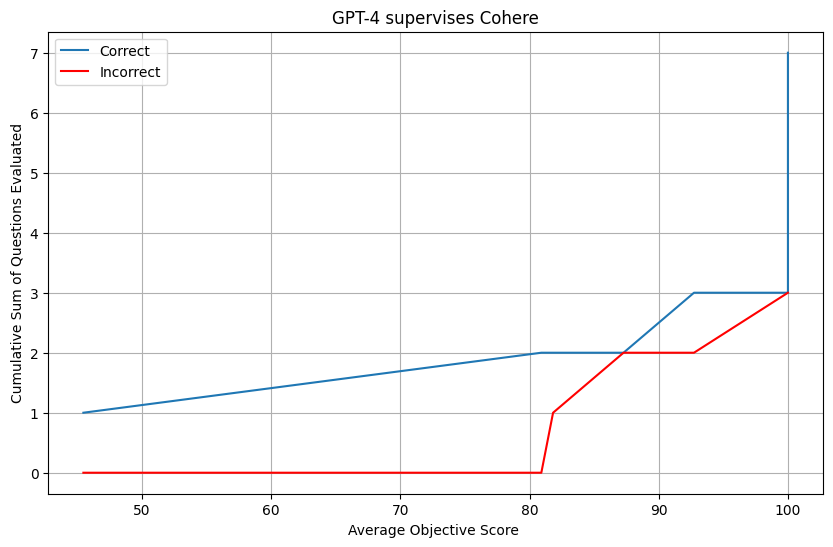

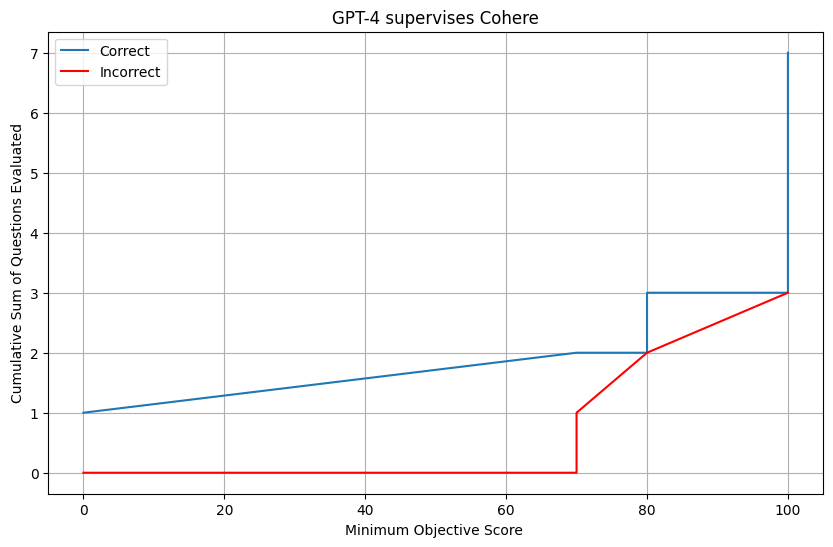

Confusion matrix:
True Negatives: 0
False Positives: 3
False Negatives: 2
True Positives: 5

Average Accuracy by LeaveOneOut strategy: 0.5
Training Accuracy: 0.9

Correlations
obj_1                    -5.939139e-02
obj_2                    -1.009417e-01
obj_3                    -4.326073e-02
obj_4                     1.000864e-16
obj_5                     1.350735e-02
obj_6                     5.681910e-02
obj_7                     1.485808e-01
obj_8                    -1.056611e-01
obj_9                     6.463056e-02
obj_10                   -4.326073e-02
obj_11                   -1.916954e-01
lowest                   -7.441168e-02
average                  -3.544234e-02
Indicator                 1.000000e+00
Cumulative Count          4.111960e-01
Cumulative Count False    5.118899e-17
Difference               -6.342703e-01
Name: Indicator, dtype: float64




In [12]:
#Needs at least one correct and one false sample
data = Collection.from_json("med_qa_10_sample_first_gpt-3.5-turbo_gpt-3.5-turbo.json")
eval_reflection(data, idx_cot=1, dataset='med_qa', split='test', plot_title='GPT-4 supervises Cohere')
predictions(data, idx_cot=1, dataset='med_qa', split='test', plot_title='GPT-4 supervises Cohere')